In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Discard the output of this cell.
#%%capture

# Install the required libraries.
!pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot
!pip install git+https://github.com/TahaAnwar/pafy.git#egg=pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/TahaAnwar/pafy.git to /tmp/pip-install-m3z4mkpp/pafy_e8701c0a6beb4561ad3cf3bc43bb2298
  Running command git clone -q https://github.com/TahaAnwar/pafy.git /tmp/pip-install-m3z4mkpp/pafy_e8701c0a6beb4561ad3cf3bc43bb2298


In [3]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [4]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [5]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 30

# Specify the directory containing the UCF50 dataset. 
DATASET_DIR = "/content/drive/MyDrive/video test"

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
CLASSES_LIST = ["neutral", "calm", "happy", "sad","angry","fearful"]

In [6]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_List = []
    
    # Read theVideo File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    print(video_frames_count)
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):
        
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        #resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        #img = resized_frame / 255
        img = frame
        
        
        # Append the normalized frame into the frames list
        frames_List.append(img)

        cv2.imwrite(os.path.join("/content/drive/MyDrive/f", "frame_" + str(frame_counter) + ".jpg"), img )
    
    # Release the VideoCapture object. 
    video_reader.release()

    # Return the frames list.
    return frames_List

In [7]:
for class_index, class_name in enumerate(CLASSES_LIST):
  files_list = os.listdir(os.path.join(DATASET_DIR))
  x=0
  for file_name in files_list:
    x=1
    video_file_path = os.path.join(DATASET_DIR, file_name)
    frames = frames_extraction(video_file_path)
  if x==1:
    break


208


In [8]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-0.5, 1919.5, 1079.5, -0.5)

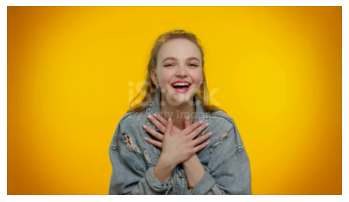

In [10]:
#extract landmark to crop frames and prepare them for testing
import cv2
import mediapipe as mp

for counter in range (30):
  
  path = "/content/drive/MyDrive/f/frame_" + str(counter) + ".jpg"
  image = cv2.imread(path)
  
  # Face Mesh
  mp_face_mesh = mp.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh()
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Facial landmarks
  result = face_mesh.process(rgb_image)
  height, width, _ = image.shape

#find the 468 facial landmarks
  for facial_landmarks in result.multi_face_landmarks:
      for i in range(0, 468):
          pt1 = facial_landmarks.landmark[i]
          x = int(pt1.x * width)
          y = int(pt1.y * height) 
          
          if i == 10:
            ymin=y
            
          elif i == 152:
            ymax=y
            
          elif i == 234:
            xmin=x
            
          elif i == 454:
            xmax=x
            
          

# define face boundries to crop
  top= ymin
  bottom= ymax
  left= xmin
  right= xmax
  

  #crop the frames
  cropped = image[top:bottom, left:right ]

  # Resize the Frame to fixed height and width.
  resized_frame = cv2.resize(cropped, (64, 64))

  #save cropped frames in drive
  cv2.imwrite(os.path.join("/content/drive/MyDrive/cf", "cropped_frame_" + str(counter) + ".jpg"), resized_frame)


#cv2.circle(rgb_image, (x, y), 7, (255, 255, 255), -1)
plt.imshow(rgb_image);plt.axis('off')

for i, t in range (30):
            img = cv2.cvtColor(video.get_frame(t), cv2.COLOR_BGR2RGB)
            # extract roi from landmarks and crop
            xs, ys = landmarks_2d_x[i], landmarks_2d_y[i]
            bottom = int(max(ys) * img.shape[0])
            right = int(max(xs) * img.shape[1])
            top = int(min(ys) * img.shape[0])
            left = int(min(xs) * img.shape[1])

            cropped = cv2.resize(img[top:bottom, left:right, :], target_resolution)
            cv2.imwrite(os.path.join(self.frames_folder, "frame_{0:.2f}.jpg".format(t)), cropped)